In [1]:
import wandb
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import torch.nn as nn
import torch.optim as optim
from transformer import *  
import matplotlib.pyplot as plt

Epoch 1/10, Train Loss: 39.1456, Val Loss: 35.9245
Epoch 2/10, Train Loss: 33.4259, Val Loss: 30.1350
Epoch 3/10, Train Loss: 28.9824, Val Loss: 27.1862
Epoch 4/10, Train Loss: 26.3775, Val Loss: 25.4612
Epoch 5/10, Train Loss: 24.8643, Val Loss: 23.4906
Epoch 6/10, Train Loss: 23.4602, Val Loss: 26.7679
Epoch 7/10, Train Loss: 22.6335, Val Loss: 21.7237
Epoch 8/10, Train Loss: 21.4494, Val Loss: 20.5355
Epoch 9/10, Train Loss: 21.0615, Val Loss: 27.8114
Epoch 10/10, Train Loss: 20.9307, Val Loss: 19.1779


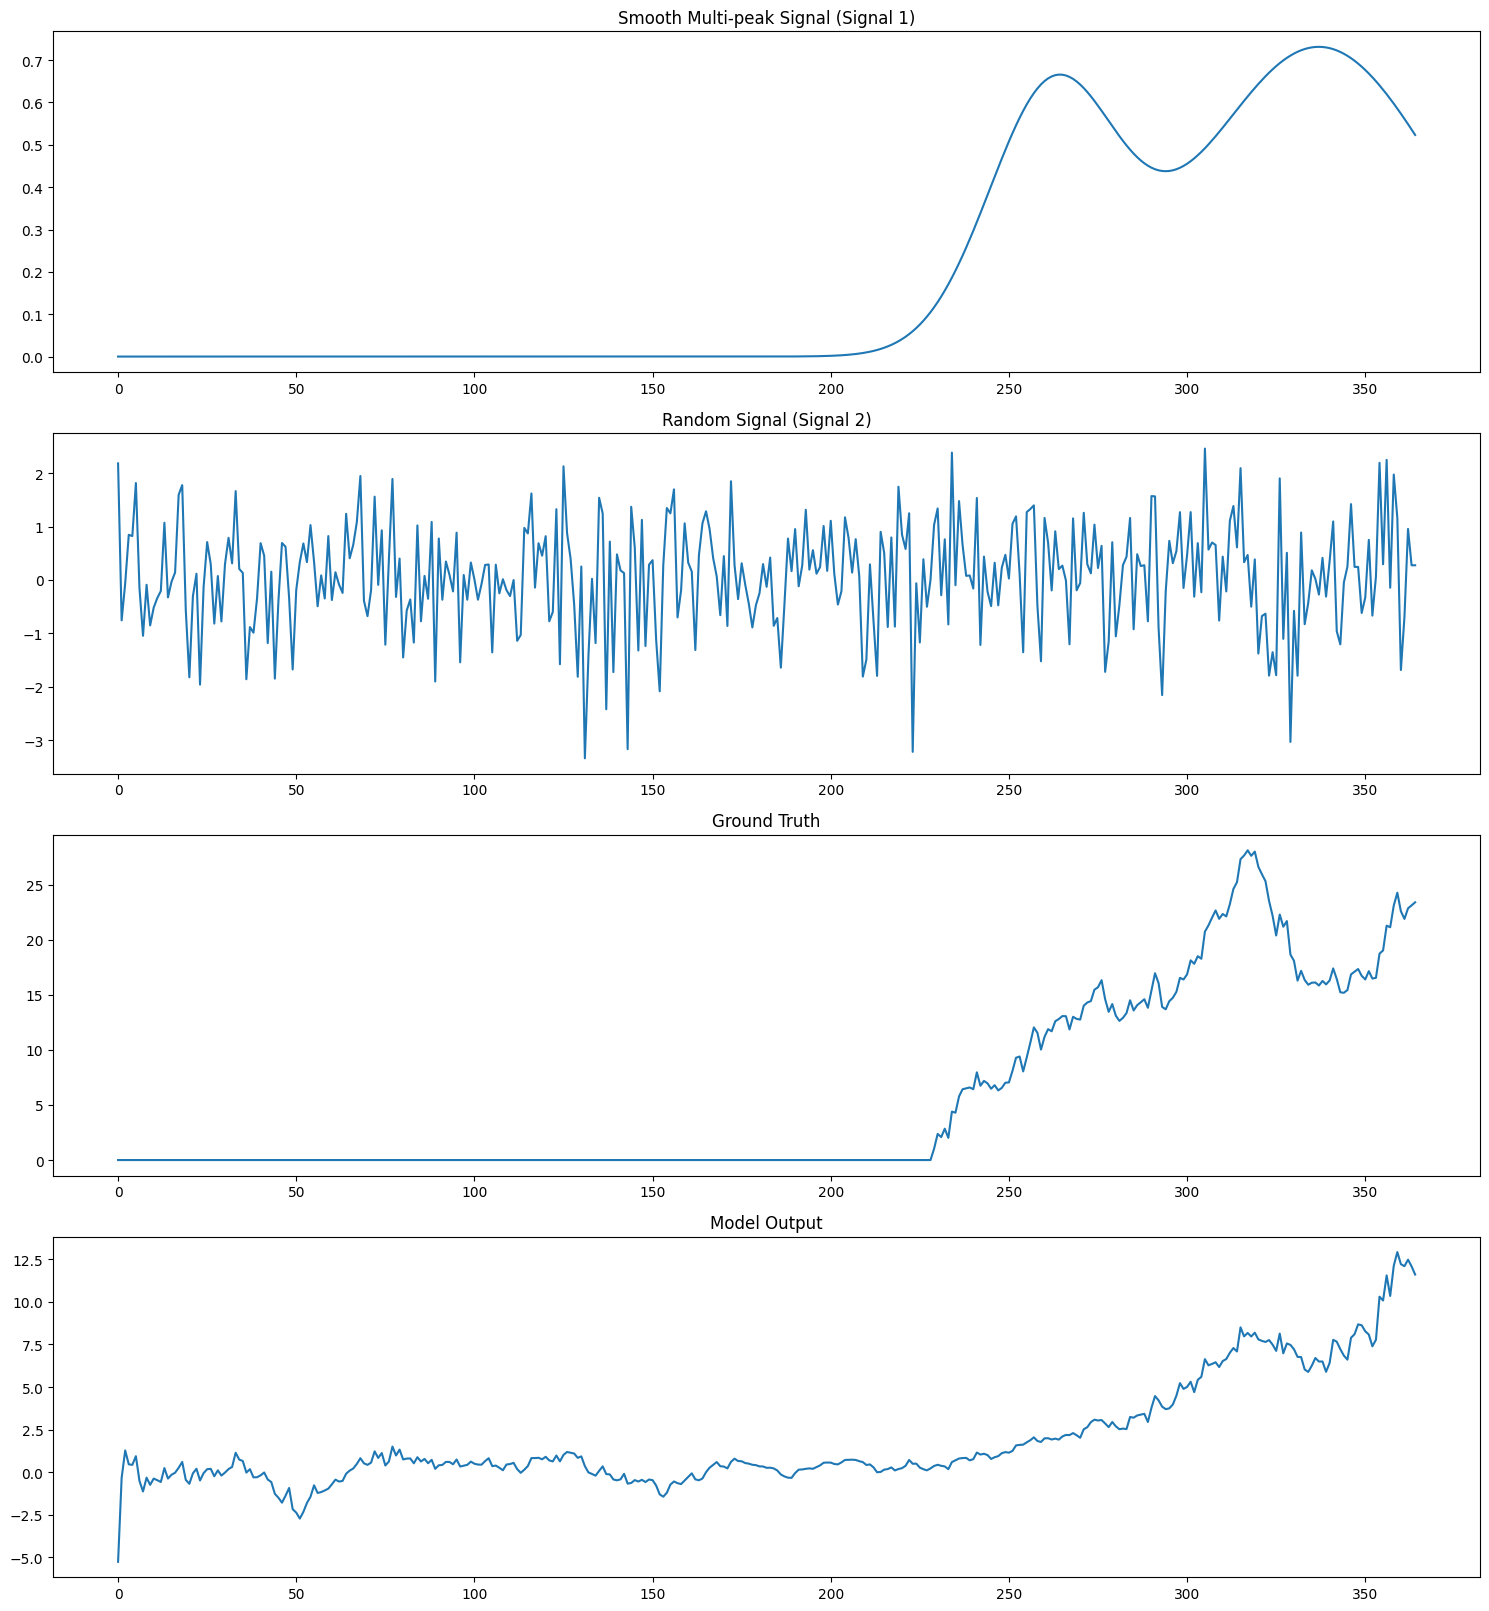

In [2]:
from transformer import *
n = 365

# load the data
train_data = torch.load('toy_data/train_data.pth')
val_data = torch.load('toy_data/val_data.pth')

train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
val_loader = DataLoader(val_data, batch_size=256)

# 模型定义
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
d_model = 4
nhead = 1

model = EncoderDecoderModel(input_dim=4, d_model=d_model, nhead=nhead, num_encoder_layers=1, dim_feedforward=4, max_seq_len=1000, num_decoder_layers=1)
model.to(device)

# wandb 配置

learning_rate = 0.005
epochs = 10
batch_size = 256

# 优化器和损失函数
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练函数
def train_model(model, train_loader, val_loader, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        

        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")
    
    return model

# 开始训练
trained_model = train_model(model, train_loader, val_loader, num_epochs=epochs)

# 保存模型
# torch.save(trained_model.state_dict(), "trained_model.pth")


test_data = torch.load('toy_data/test_data.pth')
# 测试模型
test_input, test_ground_truth = test_data.tensors

with torch.no_grad():
    model_output = trained_model(test_input.to(device))

# 可视化结果
plt.figure(figsize=(15, 20))

plt.subplot(5, 1, 1)
plt.title("Smooth Multi-peak Signal (Signal 1)")
plt.plot(test_input[5, :, 0].cpu().numpy())

plt.subplot(5, 1, 2)
plt.title("Random Signal (Signal 2)")
plt.plot(test_input[5, :, 2].cpu().numpy())

plt.subplot(5, 1, 3)
plt.title("Ground Truth")
plt.plot(test_ground_truth[5, :, 0].cpu().numpy())

plt.subplot(5, 1, 4)
plt.title("Model Output")
plt.plot(model_output[5, :, 0].cpu().numpy())

plt.tight_layout()

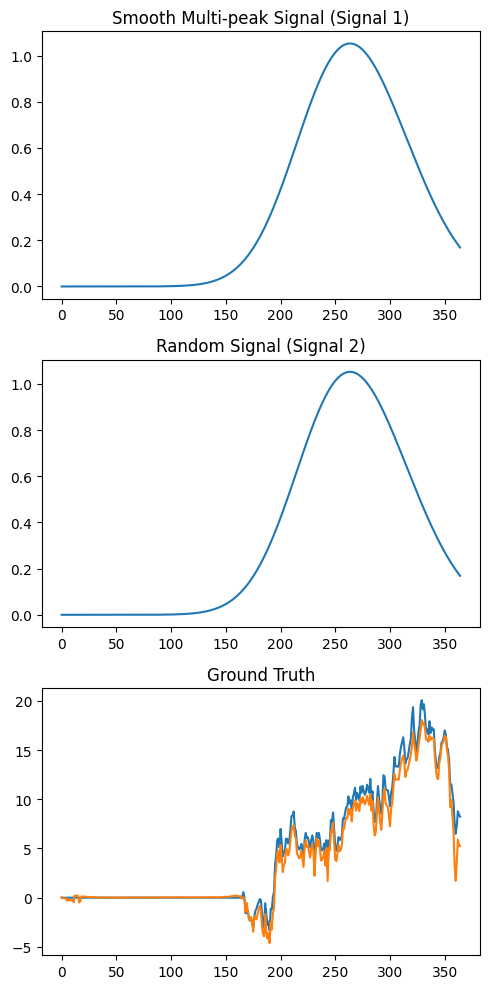

In [15]:
learning_rate = 0.001
epochs = 200
batch_size = 128
nhead = 1
d_model = 4
dim_feedforward = 8
# load trained model 
from transformer import *
trained_model = EncoderDecoderModel(input_dim=4, d_model=d_model, nhead=nhead, num_encoder_layers=1, dim_feedforward=dim_feedforward, max_seq_len=1000, num_decoder_layers=1)

trained_model.load_state_dict(torch.load("trained_model.pth"))
trained_model.to('cuda')

test_data = torch.load('toy_data/test_data.pth')
# 测试模型
test_input, test_ground_truth = test_data.tensors

with torch.no_grad():
    model_output = trained_model(test_input.to('cuda'))


# 可视化结果
plt.figure(figsize=(5, 10))
#获取随机整数n
n = np.random.randint(0, 256 )
plt.subplot(3, 1, 1)
plt.title("Smooth Multi-peak Signal (Signal 1)")
plt.plot(test_input[n, :, 0].numpy())

plt.subplot(3, 1, 2)
plt.title("Random Signal (Signal 2)")
plt.plot(test_input[n, :, 1].numpy())

plt.subplot(3, 1, 3)
plt.title("Ground Truth")
plt.plot(test_ground_truth[n, :, 0].numpy())

plt.plot(model_output[n, :, 0].cpu().numpy().transpose())
plt.tight_layout()

In [ ]:
# 可视化结果
plt.figure(figsize=(5, 10))
#获取随机整数n
n = np.random.randint(0, batch_size)
plt.subplot(3, 1, 1)
plt.title("Smooth Multi-peak Signal (Signal 1)")
plt.plot(test_signal1[n, :, 0].numpy())

plt.subplot(3, 1, 2)
plt.title("Random Signal (Signal 2)")
plt.plot(test_signal2[n, :, 0].numpy())

plt.subplot(3, 1, 3)
plt.title("Ground Truth")
plt.plot(test_ground_truth[n, :, 0].numpy())

plt.plot(model_output[n, :, 0].cpu().numpy().transpose())
plt.show()

NameError: name 'batch_size' is not defined

<Figure size 500x1000 with 0 Axes>